# ----------------------------------------------------------------------
# Supervised Learning - Logistic Regression
# ----------------------------------------------------------------------

## Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Exploring the Data - Reading the dataset file using pandas. Take care about the delimiter.


In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [400]:
# Read dataset using pandas
sd = pd.read_csv("students-data.csv", delimiter=";")
#sd.head()

In [401]:
sd.shape

(395, 33)

In [402]:
sd.head(5).T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [403]:
sd.index.name='number'

In [404]:
#check if index has a name
sd.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [405]:
#to drop the NAs
sd.dropna(axis=0, how='any', inplace=True)

In [406]:
sd.shape

(395, 33)

In [407]:
#there are no missing values in the data set

In [408]:
categorical_attributes = sd.select_dtypes(exclude='number').columns
print(categorical_attributes)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


# Q3. Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Answer:

In [409]:
# to check for columns whose variance is less than 1
sd.var()[sd.var() < 1]

traveltime    0.486513
studytime     0.704324
failures      0.553017
famrel        0.803997
freetime      0.997725
Dalc          0.793420
dtype: float64

In [410]:
# to drop columns whose variance is less than 1
sd = sd.drop(sd.var()[sd.var() < 1].index.values, axis=1)
# to check if dropped
sd.shape

(395, 27)

In [411]:
# 6 columns has been dropped

In [412]:
# columns like sex, address, famsize, Pstatus, reason, guardian, romantic
# doesn't impact much on grade so dropping these columns
sd = sd.drop(['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'romantic'], axis=1)

In [413]:
sd.shape

(395, 20)

In [414]:
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


C:\Users\swathi\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\swathi\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\swathi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\swathi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


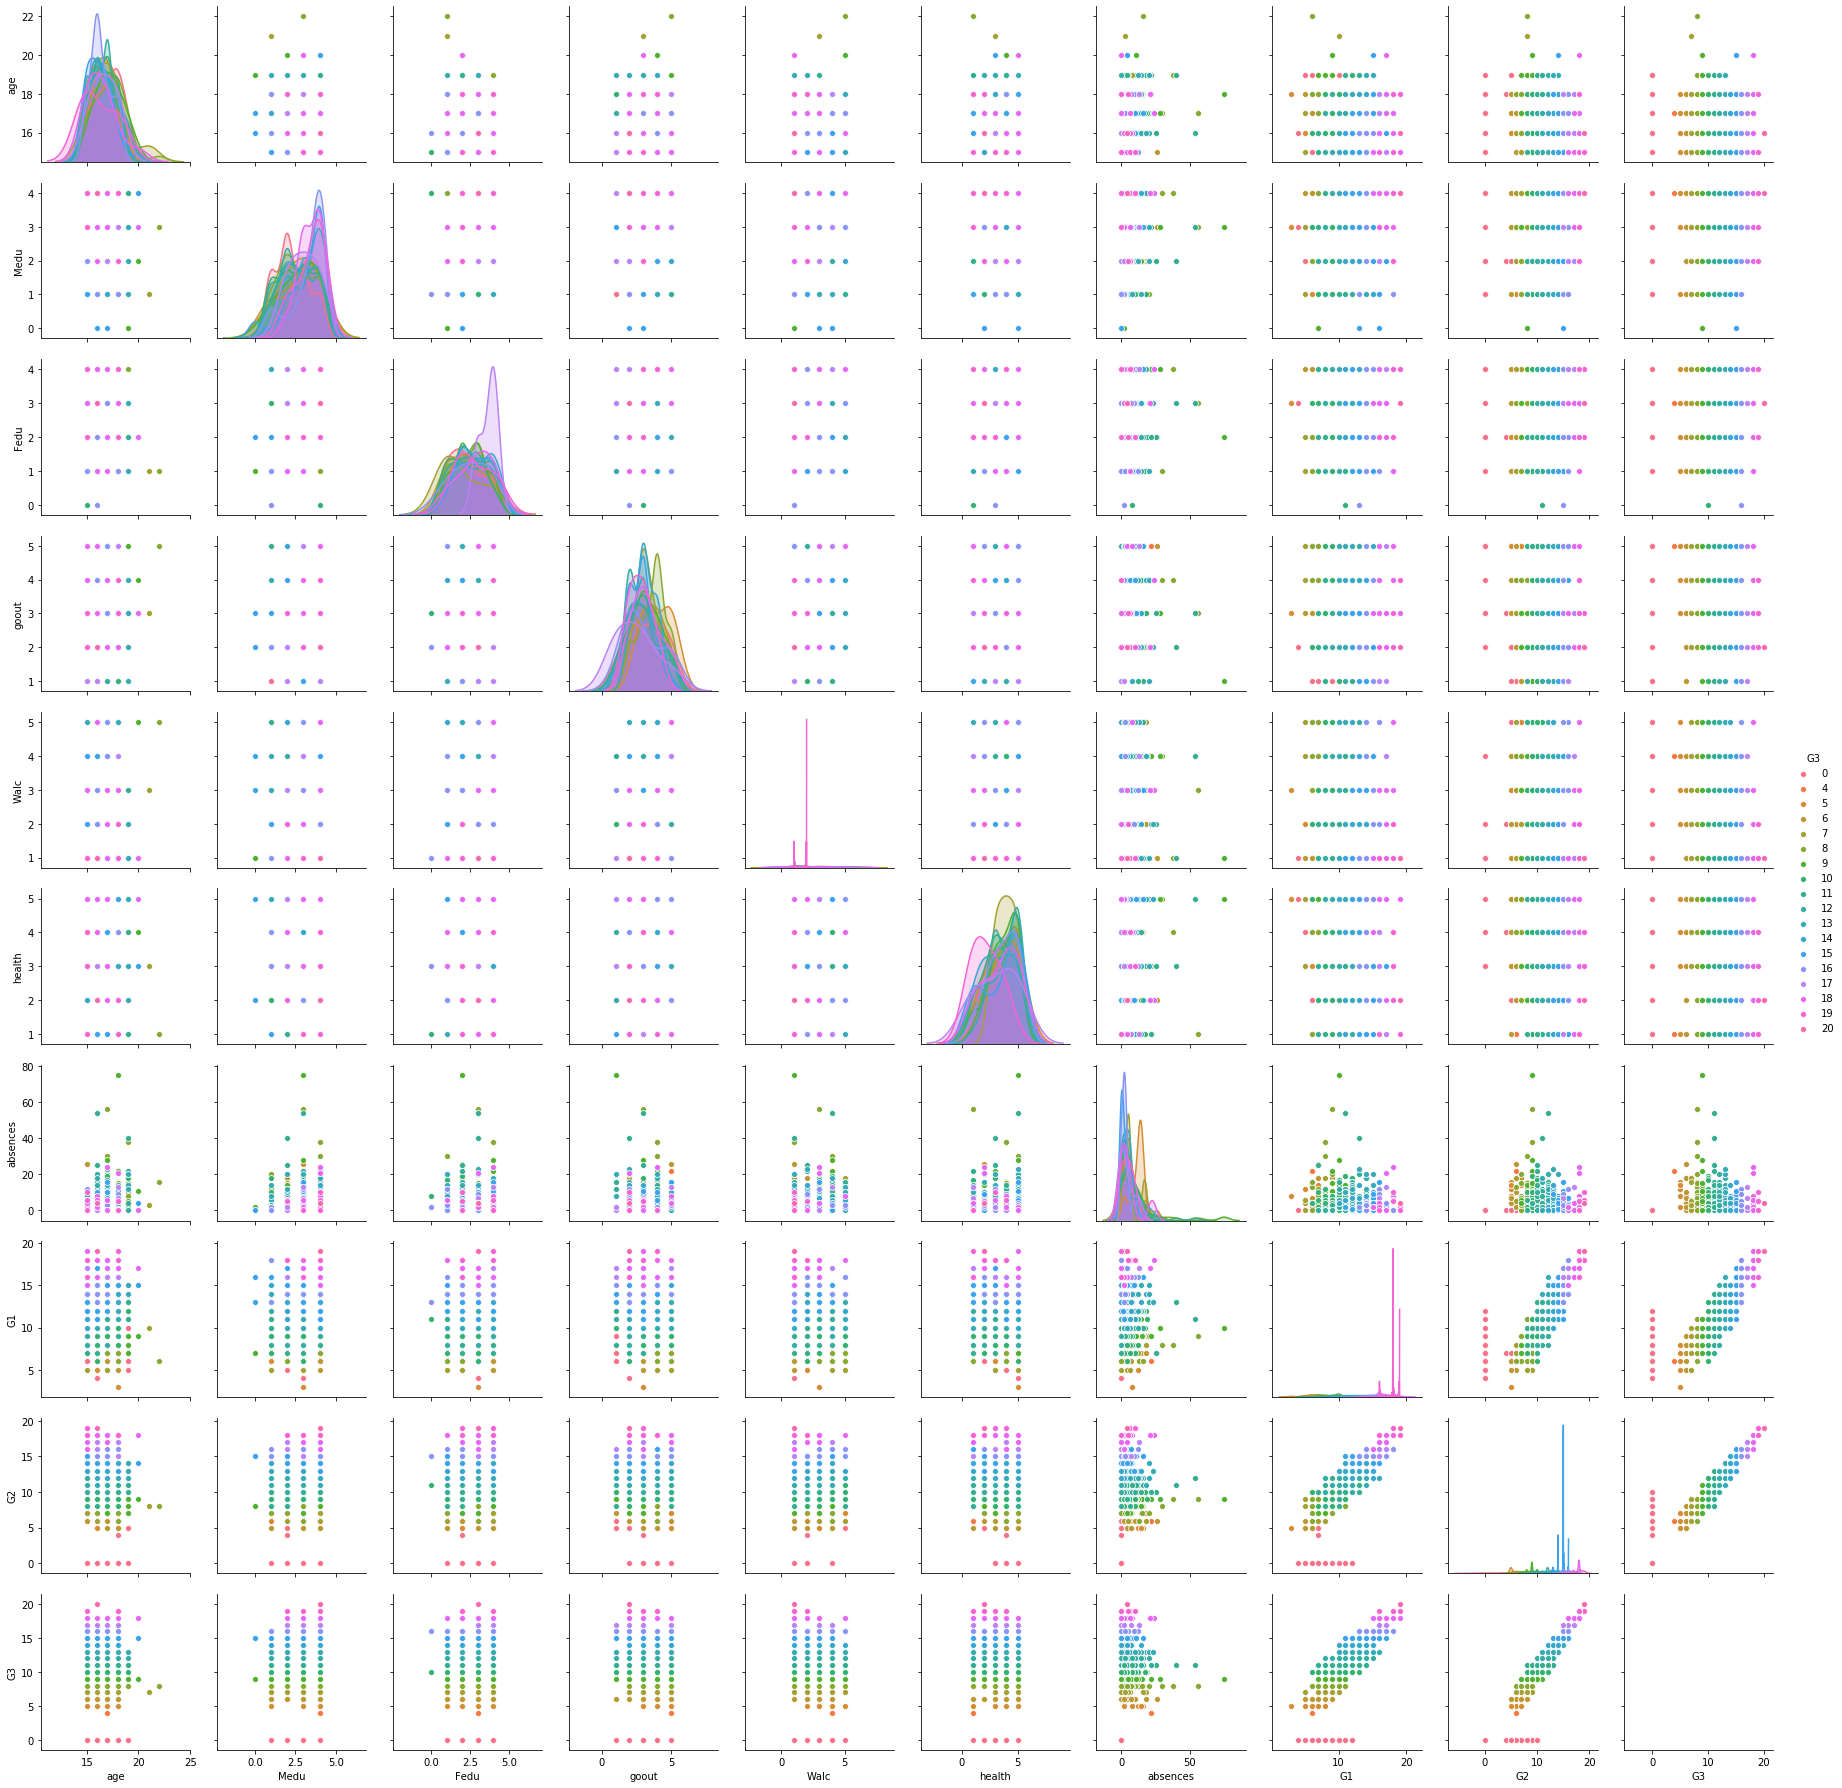

In [415]:
sns.pairplot(sd, hue='G3')

In [416]:
sd.corr()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.126964,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,0.064094,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,0.043105,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
goout,0.126964,0.064094,0.043105,1.000000,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Walc,0.117276,-0.047123,-0.012631,0.420386,1.000000,0.092476,0.136291,-0.126179,-0.084927,-0.051939
health,-0.062187,-0.046878,0.014742,-0.009577,0.092476,1.000000,-0.029937,-0.073172,-0.097720,-0.061335
absences,0.175230,0.100285,0.024473,0.044302,0.136291,-0.029937,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,0.205341,0.190270,-0.149104,-0.126179,-0.073172,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,0.215527,0.164893,-0.162250,-0.084927,-0.097720,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.217147,0.152457,-0.132791,-0.051939,-0.061335,0.034247,0.801468,0.904868,1.000000


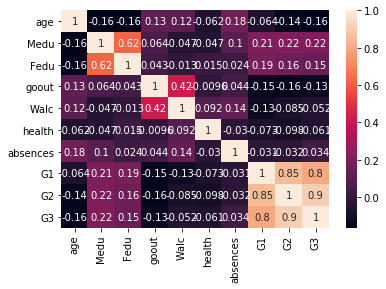

In [417]:
sns.heatmap( sd.corr(), annot=True)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Q4. Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [418]:
from sklearn.preprocessing import LabelEncoder

In [419]:
categorical_attributes = sd.select_dtypes(exclude='number').columns
le = LabelEncoder()
for c in sd[categorical_attributes]:
    le.fit(sd[c])
    sd[c] = le.transform(sd[c])

In [420]:
sd.head()

,school,age,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,nursery,higher,internet,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,
0,0,18,4,4,0,4,1,0,0,0,1,1,0,4,1,3,6,5,6,6
1,0,17,1,1,0,2,0,1,0,0,0,1,1,3,1,3,4,5,5,6
2,0,15,1,1,0,2,1,0,1,0,1,1,1,2,3,3,10,7,8,10
3,0,15,4,2,1,3,0,1,1,1,1,1,1,2,1,5,2,15,14,15
4,0,16,3,3,2,2,0,1,1,0,1,1,0,2,2,5,4,6,10,10


# Q5. Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [421]:
sd[['G1', 'G2', 'G3']] = np.where(sd[['G1', 'G2', 'G3']] >= 10, 1, 0)
sd.head()

,school,age,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,nursery,higher,internet,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,
0,0,18,4,4,0,4,1,0,0,0,1,1,0,4,1,3,6,0,0,0
1,0,17,1,1,0,2,0,1,0,0,0,1,1,3,1,3,4,0,0,0
2,0,15,1,1,0,2,1,0,1,0,1,1,1,2,3,3,10,0,0,1
3,0,15,4,2,1,3,0,1,1,1,1,1,1,2,1,5,2,1,1,1
4,0,16,3,3,2,2,0,1,1,0,1,1,0,2,2,5,4,0,1,1


# Q6. Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.

#### Answer:

In [422]:
# dropping number column as it wont have any impact on the data
X = sd.drop('G3', axis=1)

In [423]:
X.head()

,school,age,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,nursery,higher,internet,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,
0,0,18,4,4,0,4,1,0,0,0,1,1,0,4,1,3,6,0,0
1,0,17,1,1,0,2,0,1,0,0,0,1,1,3,1,3,4,0,0
2,0,15,1,1,0,2,1,0,1,0,1,1,1,2,3,3,10,0,0
3,0,15,4,2,1,3,0,1,1,1,1,1,1,2,1,5,2,1,1
4,0,16,3,3,2,2,0,1,1,0,1,1,0,2,2,5,4,0,1


In [424]:
y = sd['G3']

In [425]:
y.head()

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64

## Visualization

# Q7. Plot G2 and G3 and give your understanding on relation between both variables.

### Hint: Use pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

#### Answer:

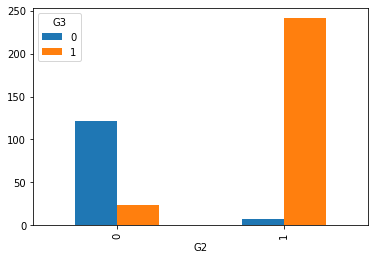

In [442]:
pd.crosstab(sd.G2, sd.G3).plot(kind='bar')

In [444]:
# 122 students failed both G2 and G3
# 241 students passed both G2 and G3
# 8 students passed in G2 but failed in G3
# 24 students failed in G2 but passed in G3

In [445]:
pd.crosstab(sd.G2, sd.G3)

G3,0,1
G2,,
0,122,24
1,8,241


# Q8. Plot the number of students in each school and number of students with different ages in separate plots.

### Hint: use seaborn sns.countplot()

#### Answer:

In [446]:
import seaborn as sns

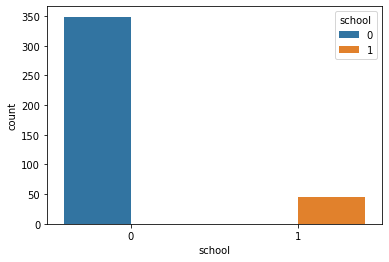

In [447]:
sns.countplot(x='school', hue='school', data=sd)

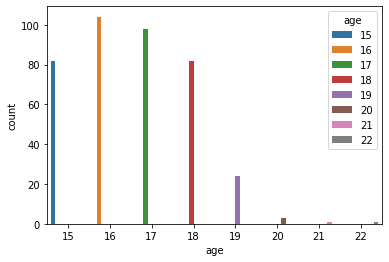

In [448]:
sns.countplot(x='age', hue='age', data=sd)

# Q9. Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)


In [457]:
print("Train records: ", len(X_train.index))
print("Test records: ", len(X_test.index))

Train records:  300
Test records:  95


# Q10. - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*

#### Answer:

In [458]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [459]:
lrmodel = LogisticRegression()

In [460]:
lrmodel.fit(X_train, y_train)

C:\Users\swathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
y_predict = lrmodel.predict(X_test)

In [462]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), recall_score(y_test, y_predict, average= 'weighted'), precision_score(y_test, y_predict, average= 'weighted'), f1_score(y_test, y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])


,0
accuracy,0.894737
recall,0.894737
precision,0.897652
f1_score,0.895754


In [463]:
# we can say that the model is good with an acuuracy of 89%

# ----------------------------------------------------------------------
# Supervised Leaning - Naive Bayes with Iris Data
# ----------------------------------------------------------------------

In [464]:
#Load all required library
#from sklearn import datasets
#from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [465]:
# Load using input file
iris=pd.read_csv("Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Treat NaN's/ Null values found

In [466]:
iris=iris.fillna(0)

### Slice  Iris data set for Independent variables and dependent variables

#### Please note 'Species' is your dependent variable, name it y and independent set data as X

In [467]:
#X=iris.iloc[:,:4].values
#y=iris['Species'].values

In [468]:
#Check the dataset
#print(y)
#print(X)

# Q1.  Find the distribution of target variable (Species) and, Plot the distribution of target variable using histogram

In [469]:
iris.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


In [ ]:
# the target variable is more or less equally ditributed which is a good indication a model can be trained at high accuracy. 

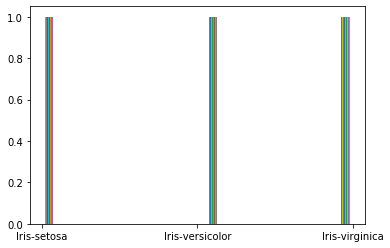

In [470]:
plt.hist(iris['Species'])
plt.show()

In [ ]:
# Drop Id variable from data

In [471]:
iris = iris.drop('Id', axis=1)

# Q2. Find Correlation among all variables and give your insights 

In [472]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.668652,-0.246073,0.936151,1.000000


In [473]:
#SepalWidthCm has a poor correlation with all the attributes hence not much impact on the data
#SepalLengthCm, PetalLengthCm, PetalWidthCm are strongly correlated hence can impact the data

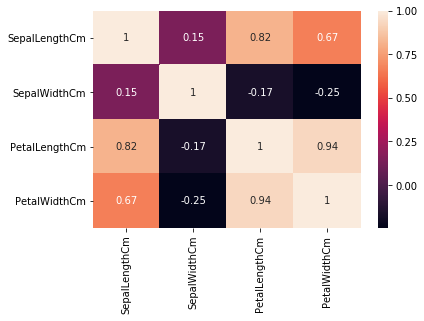

In [474]:
sns.heatmap( iris.corr(), annot=True)

### Split data in Training and test set in 80:20.

In [475]:
# converting target varible, which is categorical, into numeric
le = LabelEncoder()
le.fit(iris['Species'])
iris['Species'] = le.transform(iris['Species'])

In [476]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#print(X_train.shape)

# Q3. Feature Scaling on X_Train and X_Test

In [478]:
# Use StandardScaler or similar methods

In [479]:
from sklearn.preprocessing import StandardScaler

In [480]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
#print(X_train)

In [481]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Q4. Train and Fit NaiveBayes Model

In [482]:
#Fit the model
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [483]:
#Predict
predicted = nbmodel.predict(X_test)

# Q5.  Print Accuracy and Confusion Matrix and Conclude your findings

In [484]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix

In [490]:
confusion_matrix(predicted, y_test)

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 11]], dtype=int64)

In [486]:
sum(y_test)

36

In [487]:
# show  accuracy_score, recall_score, precision_score, f1_score
pd.DataFrame(data=[accuracy_score(predicted, y_test), 
                   recall_score(predicted, y_test, average='weighted'),
                   precision_score(predicted, y_test, average='weighted'),
                   f1_score(predicted, y_test, average='weighted')], 
             index=["accuracy", "recall", "precision", "f1Score"])

,0
accuracy,0.935484
recall,0.935484
precision,0.945409
f1Score,0.935239


In [ ]:
# Insights
# the model overall accuracy on the test set is 0.935
# An insight we can get from the confusion matrix is that the model is very accurate at classifying setosa.
# However, accuracy for virginica is lower (11/13 = 0.846).